In [1]:
import numpy as np
from scipy.interpolate import griddata
import matplotlib.pyplot as plt



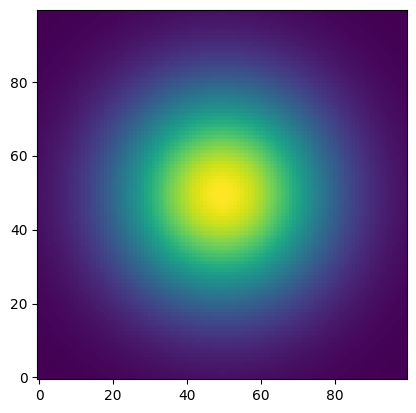

In [2]:
# Define a gaussian in a center of a 100x100 grid
size = 100
sigma = 20.0  # Standard deviation
center = (size - 1) / 2  # Center of the array

# Create meshgrid
x = np.arange(size)
y = np.arange(size)
X, Y = np.meshgrid(x, y)

# Calculate Gaussian
Z = np.exp(-((X - center)**2 + (Y - center)**2) / (2 * sigma**2))
plt.imshow(Z.T, origin='lower')

In [3]:
# select 300 randomly points in the domain 

# Define the grid size and number of points to select
grid_size = size
num_points = 300

# Generate all possible indices as (row, column) pairs
rows, cols = np.indices((grid_size, grid_size))
all_points = np.vstack((rows.ravel(), cols.ravel())).T

# Randomly select 300 unique points
selected_indices = np.random.choice(len(all_points), num_points, replace=False)
selected_points = all_points[selected_indices]

# Print or use the selected points
#print(selected_points)


In [4]:
# set points and values that read the selected points and define an array with the spare data

idx = selected_points
points = np.dstack((x[idx[:,0]],y[idx[:,1]] ))[0]
values = Z[idx[:,0], idx[:,1]]

grid_z0 = np.zeros_like(Z) + np.nan
grid_z0[x[idx[:,0]],y[idx[:,1]]] = Z[x[idx[:,0]],y[idx[:,1]]]

In [7]:
#perform 2D interpolation from the sparse array
#using https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.griddata.html
grid_z1 = griddata(points, values, (X, Y), method='nearest')


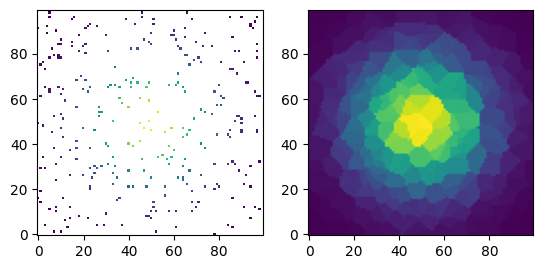

In [6]:
#plot 

ax = plt.subplot(121)
plt.imshow(grid_z0.T, origin='lower', interpolation='nearest')
ax = plt.subplot(122)
plt.imshow(grid_z1.T, origin='lower')